# Feature Extraction 
- also known as 
  - Feature Engineering/Test Representaion/Text Vectorization
  - Converting Text to number format
 
 ## Techniques:
     1. One Hot Encoding
     2. Bag of words
     3. N-Grams
     4. TFIDF
     5. Custom Features
     6. Word2Vec(DL Algo)
    
 ## Common Terms:
     1. **Corpus c** -------: collection of all words (like collection of all review in single string 50k words )
     2. **Vocabulary v** ---: all unique words in word collection (like... all unique words in 50k words )
     3. **Document d** ----: every single/unique data (like... every single review in dataset)
     4. **Words w** --------: every word of document

# 1. One Hot Encoding
   - Advantages:
        - Easy to use
        - Easy to understand
   - Disadvantages:
       - **Sparcity** (more no of zeros) which tends to overfitting
           - let if there are corpus of 50k words and total vocabulary v=100 in 1000 documents,
              now when we assign no. to words then, in every words there will 99 zeros and one 1
       - Out of Vocabulary(OOV) problem: cannot handle new vocabulary which is not present in corpus
       - No fixed size
       - No capturing semantic meaning ( walk and run are more related to each other, then pen), but OHE not capture this data
- that's why nobody use this technique in NLP, but it makes easy to understand other techniques 


### Steps:
 1. Create data to corpus(all text to one string or paragraph)
 2. Vocabulary: Find all unique words (if there is 5 unique words then shape of encoded data will be 5, no of documents)
 3. 

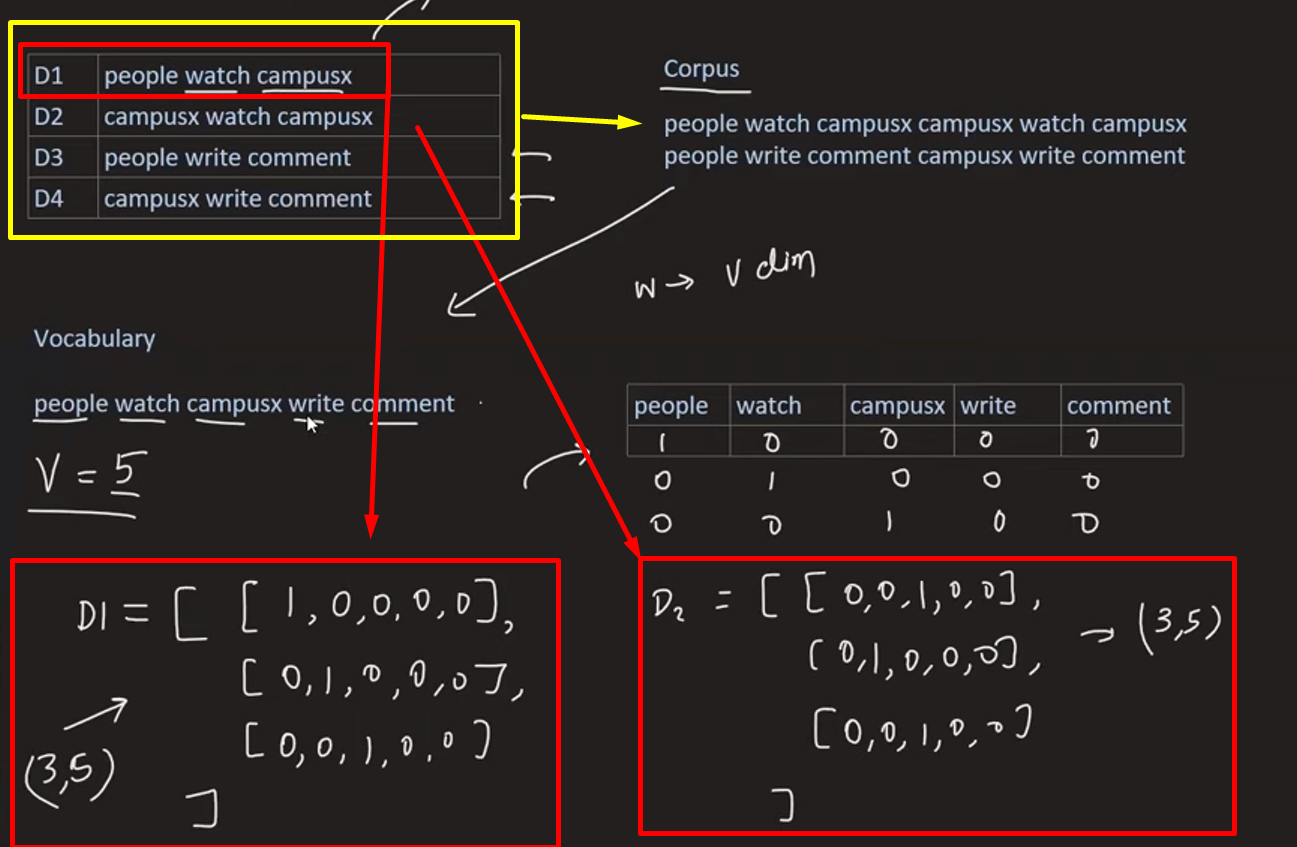

# 2. Bag of Words
 - most used in text classification(gives best perfomance)
 
 1. it capture the frequency of words occurence
 2. order of words not matter, frequency of words matter
 3. aslo this capture semantic meaning where OHE was not capturing
     - capture semantic meaning using frequency no words(calculate using cos0)
 
 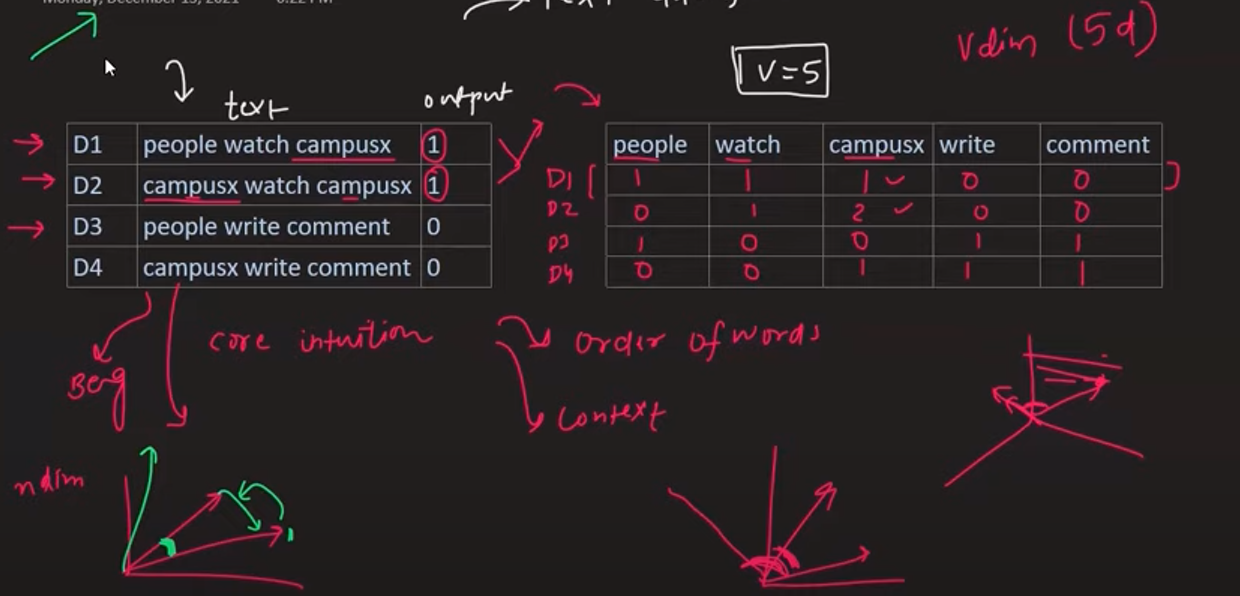
 

# Code

In [41]:
import pandas as pd
import numpy as np

# creating a demo dataframe
df=pd.DataFrame({'text':['people watch campusx','campusx watch campusx','people write comment','campusx write comment'],'output':[1,1,0,0]})


In [42]:
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
cv = CountVectorizer()

In [45]:
# pass the dataframe text to object
bow = cv.fit_transform(df['text'])  #bow = bag of words

In [46]:
# object cv extracted all vocabulary, let's print
print(cv.vocabulary_) # word as per thier occurence in text where no showing index position alphabetically

{'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}


In [47]:
# lets sort by value
a = sorted((cv.vocabulary_).items(), key=lambda x: x[1])    
print(a)

[('campusx', 0), ('comment', 1), ('people', 2), ('watch', 3), ('write', 4)]


In [48]:
# no, let convert first row to number

In [49]:
print("Text .........:",df['text'][0])
print("Text to number: ",bow[0].toarray())

Text .........: people watch campusx
Text to number:  [[1 0 1 1 0]]


- campusx: 1 time, people: 0 time, people: 1 time, watch: 1 time, write: 0 time

In [50]:
print("Text .........:",df['text'][1])
print("Text to number: ",bow[1].toarray())

Text .........: campusx watch campusx
Text to number:  [[2 0 0 1 0]]


- campusx: 2 times, people: 0 time, people: 0 time, watch: 1 time, write: 0 time

In [51]:
# let's check out of vocabulary problem handle or not

cv.transform(['campusx watch and write comment of campusx on youtube']).toarray()

array([[2, 1, 0, 1, 1]], dtype=int64)

here we can say, BOW handle OOV problem
- it ignored the words which were not present in vocabulary
   - example.... (and, of, on, youtube) were not present in trainig dataset, although (and, of, on) are stopwords so it will be removed in text preprocessing

- only focus on the words which are present in the vocabulary else other words will be ignored
- NOTE: this an problem as well, because those words are ignore maybe gives better result or infomative

## Parameters of CountVectorizer

class sklearn.feature_extraction.text.CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)

- **lowercase** : bool, default=True
     - Convert all characters to lowercase before tokenizing.
     
- **stop_words**: {‘english’}, list, default=None
    - If ‘english’, a built-in stop word list for English is used. There are several known issues with ‘english’ and you should consider an alternative
    
- binary: bool, default=False
    - If True, all non zero counts are set to 1. This is useful for discrete probabilistic models that model binary events rather than integer counts.
    - means all greater then 0 values will become as 1 that means it not focus on frequency, now focus on text is present or not 1 means present, 0 means not present
    - it helps in sentiment analysis
- max_features: int, default=None
    - If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
    - This parameter is ignored if vocabulary is not None.
    - let if max_features = 1, it means it will only create one feature that have the maximum occurence, if 2 means 2 features with 2 most occurance words
    - it helps when there are lot's of words and there are some rarely words, so remove them by using this params
- <p style="color:red;font-weight:bold;font-size:20px;"> ngram_range </p>
     tuple (min_n, max_n), default=(1, 1) <br>
     The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. All values of n such such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. Only applies if analyzer is not callable.

### advantages:
    1. Simple and intutive 
    2. A bit caputering semantic meaning, not completly
### disadvatage:
    1. Sparcity on large dataset(overfitting)
    2. OOV: ignoring new words which maybe informative
    3. Not capturing the order of words... in engligh lanugage (or any) if order of words are changed then meaning also 
        changed, so it is important to capture ordering... some algos capture it(RRN, LSTM)
    4. Not capture big changes in sentence
       a. (i am good, i am not good) both sentences are completely opposite but BOW consider as closely related to each 
           other bcoz most of the words are similar instead of one word, this is the big issue(only one word 'not' changed 
           the complete meaning of sentence)

# 3. N-grams
- parameter of Bag of Words
- also known as Bag of N-grams(Bi-grams, Tri-gramns...)

<p style="color:yellow;font-weight:bold;font-size:15px;"> Till the above algorithms we were creating Vocabulary using single words, that the reason not able to capture the ordering of words that problem solves N-grams</p>

<p style="color:red;font-weight:bold;font-size:12px;">Rather then taking single word for vocabulary here we take multiple words as vocabulary</p>

- <ul><p style="font-size:15px;color:blue">N-grams : N represents the no of words</p>
    <li>Two words of voc called as Bi-grams </li>
    <li>Three words of voc called as Tri-grams</li>
    <li>Four words of voc called as Quad-grams</li>

   </ul>

### Example of Bi-grams
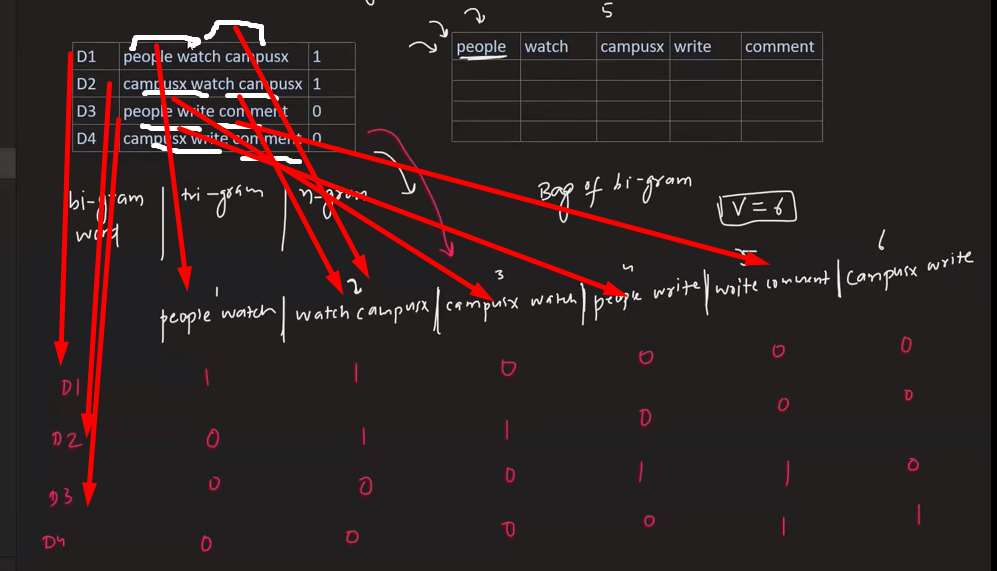
- for above data Tri-gram possible but more then Tri-gram not possible bcoz are there are not more then 3 words on any documents
### Tri-grams
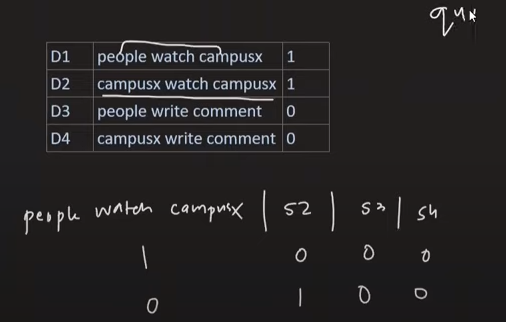

 # Code Implementation:
 ## N-grams is a parameter in Bag of Words
 <p style="color:red;font-weight:bold;font-size:20px;"> ngram_range </p>
     tuple (min_n, max_n), default=(1, 1) <br>
     The lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted. All values of n such such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. Only applies if analyzer is not callable.

In [60]:
# ngram_range = (1,1) is specail case of ngram
# what does it means (1,1)? It means vocab of only one words
# what does it means (1,2)? It means vocab of one-one words as well as two words
# what does it means (2,2)? It means vocab of only two words
# what does it means (3,3)? It means vocab of only three words
# what does it means (1,3)? It means vocab of one words + two words + three words

In [53]:
cv2 = CountVectorizer(ngram_range=(2,2))

bow2 = cv2.fit_transform(df['text'])

print("Vocabulary of Bi-gram")
cv2.vocabulary_

In [62]:
cv2 = CountVectorizer(ngram_range=(1,2))

bow2 = cv2.fit_transform(df['text'])

print("Vocabulary of Uni-grams and Bi-gram (one words and two words)")
cv2.vocabulary_

Vocabulary of Uni-grams and Bi-gram (one words and two words)


{'people': 4,
 'watch': 7,
 'campusx': 0,
 'people watch': 5,
 'watch campusx': 8,
 'campusx watch': 1,
 'write': 9,
 'comment': 3,
 'people write': 6,
 'write comment': 10,
 'campusx write': 2}

In [64]:
cv2 = CountVectorizer(ngram_range=(1,3))

bow2 = cv2.fit_transform(df['text'])

print("Vocabulary of Uni-grams and Bi-gram and Tri-grams (one word and two words and Three words)")
cv2.vocabulary_

Vocabulary of Uni-grams and Bi-gram and Tri-grams (one word and two words and Three words)


{'people': 6,
 'watch': 11,
 'campusx': 0,
 'people watch': 7,
 'watch campusx': 12,
 'people watch campusx': 8,
 'campusx watch': 1,
 'campusx watch campusx': 2,
 'write': 13,
 'comment': 5,
 'people write': 9,
 'write comment': 14,
 'people write comment': 10,
 'campusx write': 3,
 'campusx write comment': 4}

In [66]:
cv2 = CountVectorizer(ngram_range=(3,3))

bow2 = cv2.fit_transform(df['text'])

print("Vocabulary of Tri-gram (Three words)")
cv2.vocabulary_

Vocabulary of Tri-gram (Three words)


{'people watch campusx': 2,
 'campusx watch campusx': 0,
 'people write comment': 3,
 'campusx write comment': 1}

In [78]:
try: 
    cv2 = CountVectorizer(ngram_range=(4,4))

    bow2 = cv2.fit_transform(df['text'])

    print("Vocabulary of Uni-grams and Bi-gram (one words and two words)")
    print(cv2.vocabulary_)
except Exception as e:
    print(e)

empty vocabulary; perhaps the documents only contain stop words


In [75]:
## so, for more then three words vocab will not be created as there are not more three words present in single document of our dataset
# but is it posssible in real world dataset

In [79]:
try: 
    cv2 = CountVectorizer(ngram_range=(1,5))
    bow2 = cv2.fit_transform(df['text'])
    print("Vocabulary of Uni-grams and Bi-gram (one words and two words)")
    print(cv2.vocabulary_)
except Exception as e:
    print(e)

Vocabulary of Uni-grams and Bi-gram (one words and two words)
{'people': 6, 'watch': 11, 'campusx': 0, 'people watch': 7, 'watch campusx': 12, 'people watch campusx': 8, 'campusx watch': 1, 'campusx watch campusx': 2, 'write': 13, 'comment': 5, 'people write': 9, 'write comment': 14, 'people write comment': 10, 'campusx write': 3, 'campusx write comment': 4}


In [80]:
# for (1, any int) it is possible to create vocab

# Benifits of N-grams

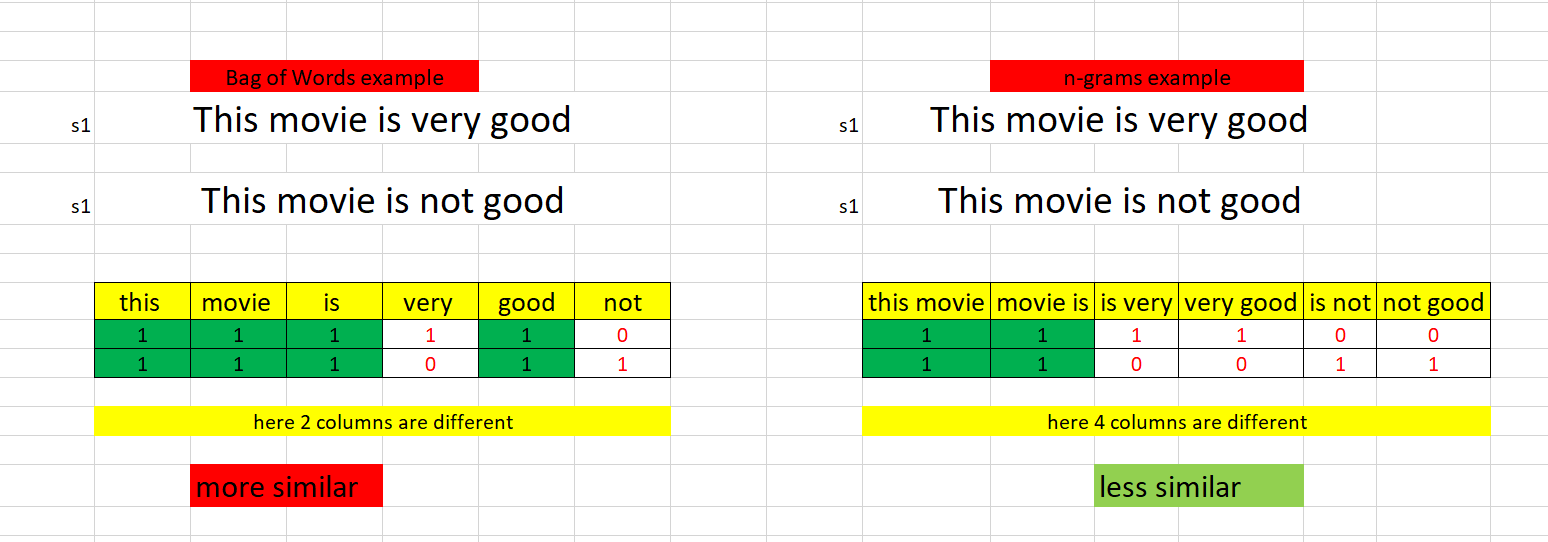

### here we  are able to capture more semantic meaning in n-grams then bagofwords

### Advt:
    1. Able to capture semantic meaning
    2. Easy to implement

### Disadvt:
    1. model slows down: No of vocab more then unigrams(BoW)- this will increase computation time on large dataset
    2. OOV : still there is no way to handle new words except the ignoring

# 4. TF-IDF
- Term Frequency - Inverse Document Frequency
- TF----> it tells how much a word important in a document
- IDF---> it tells how much a word important in entire corpus

1. TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).
2. Terminologies:
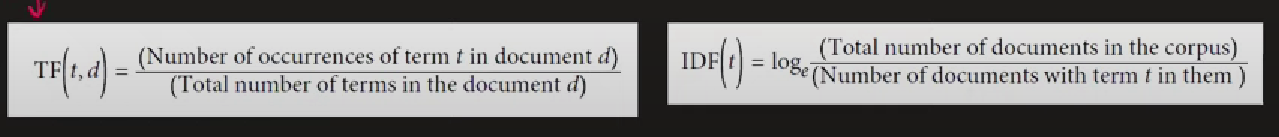
    - Term Frequency: In document d, the frequency represents the number of instances of a given word t. Therefore, we can see that it becomes more relevant when a word appears in the text, which is rational. Since the ordering of terms is not significant, we can use a vector to describe the text in the bag of term models. For each specific term in the paper, there is an entry with the value being the term frequency.
   - The weight of a term that occurs in a document is simply proportional to the term frequency.
    <p style="color:yellow;font-size:20px;text-align:center"> tf(t,d) = count of t in d / number of words in d </p>
    
   - Document Frequency: This tests the meaning of the text, which is very similar to TF, in the whole corpus collection. The only difference is that in document d, TF is the frequency counter for a term t, while df is the number of occurrences in the document set N of the term t. In other words, the number of papers in which the word is present is DF.
    <p style="color:yellow;font-size:20px;text-align:center"> df(t) = occurrence of t in documents </p>
    
   - Inverse Document Frequency: Mainly, it tests how relevant the word is. The key aim of the search is to locate the appropriate records that fit the demand. Since tf considers all terms equally significant, it is therefore not only possible to use the term frequencies to measure the weight of the term in the paper. First, find the document frequency of a term t by counting the number of documents containing the term:
   <p style="color:yellow;font-size:20px;text-align:center">idf(t) = N/ df(t) = N/N(t) </p>

In [82]:
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


# Term Frequency:-
- Tf means frequency of single word in a document
- more no of occurence means more frequency and also **more probability**
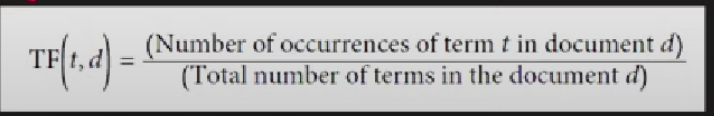

- example: No of 'campusx' in document1(row 1)/ total words in document1 = 1/3 = probability(0.3)
- no of 'campusx'in document2(row2)/total no of words = 2/3 = probability(0.6)

# Inverse Term Frequcny:-
- inverse of tf
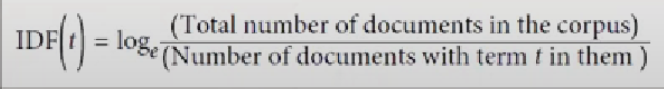

- LOGe(total no of documents(total records) in data/total no of documents in which that words present)
- we can calculate idf for every words(term)
- example: let's calculate idf for word 'campusx'
        idf = loge(4/3)
        let's calculate idf for word 'comment'
        idf = loge(4/3)

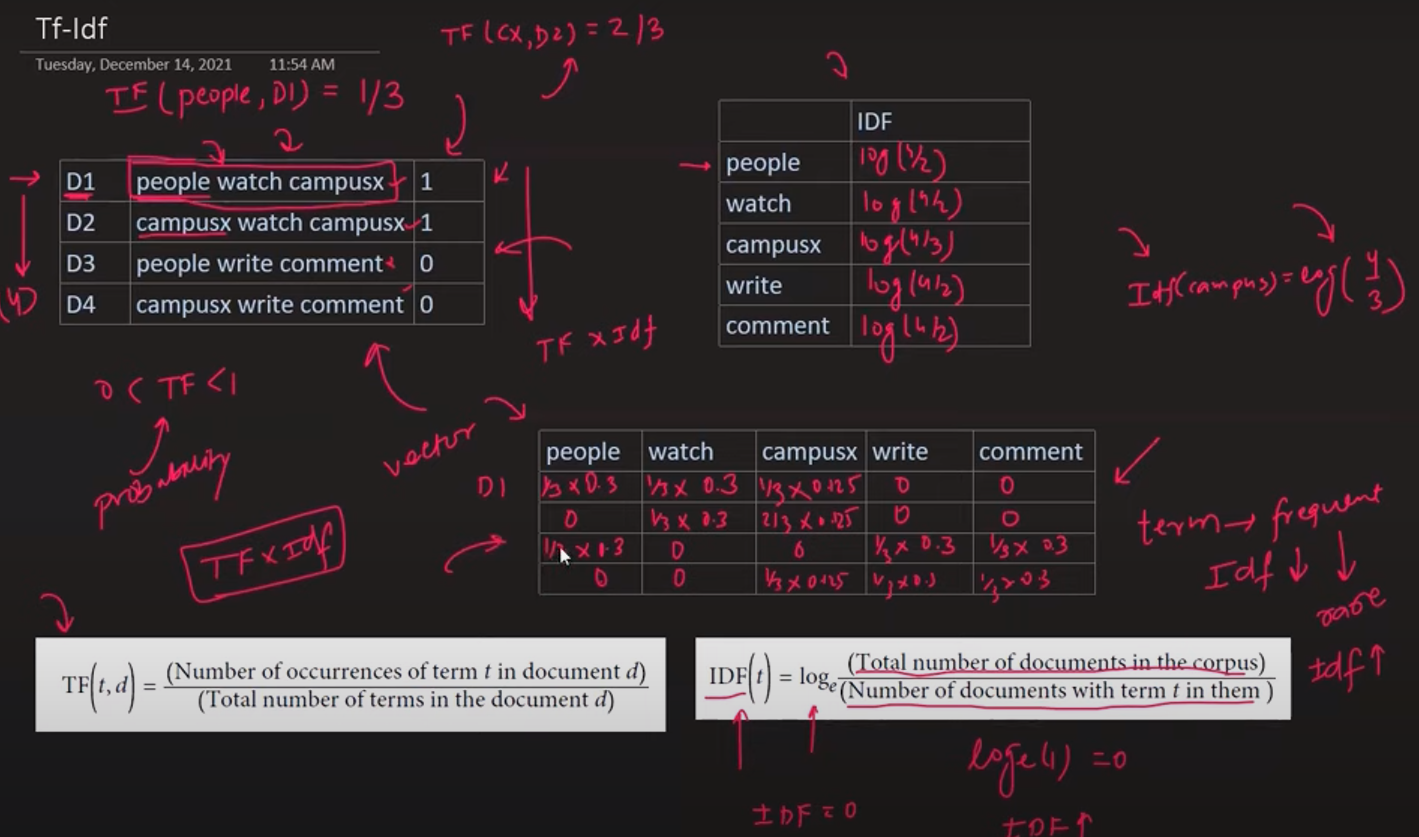

In [83]:
 # Code

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
tfidf = TfidfVectorizer()
tfidf.fit_transform(df['text']).toarray() # return sparce metric, so convert into array

array([[0.49681612, 0.        , 0.61366674, 0.61366674, 0.        ],
       [0.8508161 , 0.        , 0.        , 0.52546357, 0.        ],
       [0.        , 0.57735027, 0.57735027, 0.        , 0.57735027],
       [0.49681612, 0.61366674, 0.        , 0.        , 0.61366674]])

In [90]:
# print(idf and feature(vocab))
print("IDF",tfidf.idf_)
print("Vocab: ", tfidf.get_feature_names_out())

IDF [1.22314355 1.51082562 1.51082562 1.51082562 1.51082562]
Vocab:  ['campusx' 'comment' 'people' 'watch' 'write']


## Sklearn usege bit diffrent formula..they add 1 in idf, reason below
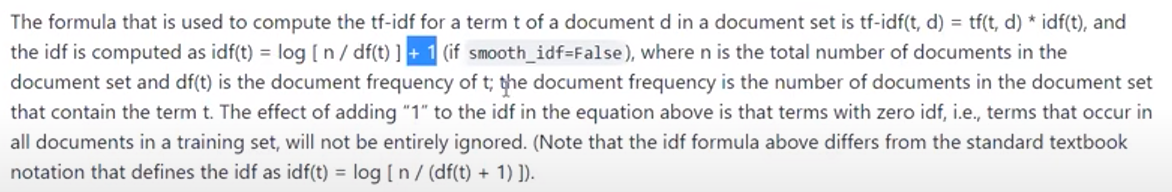
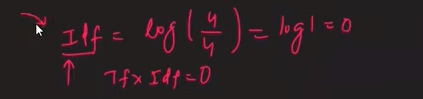

- if a word occur in every document then thier idf will become zero(as per standard formula) and that reason contribution of that words ignored to avaid this problem sklean add 1

### Why log in IDF?
 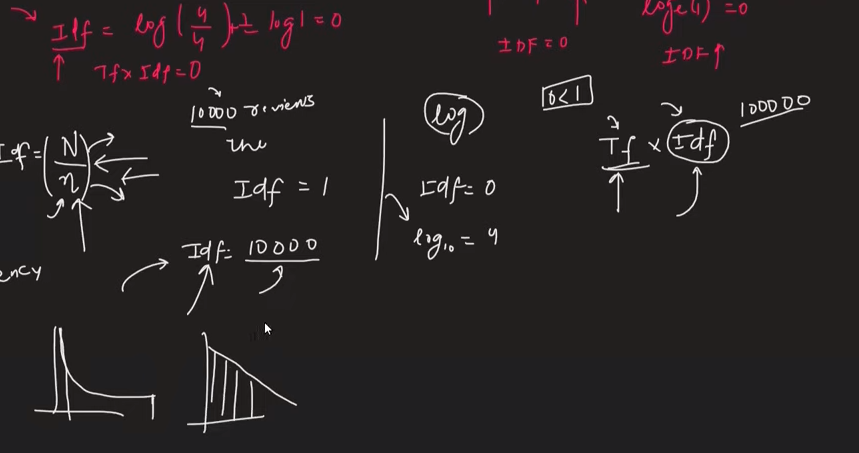
 
 - log use to nomalise big IDF value to small value
 

## Advt
    - mostly used in Information retrieval(search engines)
## Diadvt
    - Sparcity
    - OOV: cannot handle new words
    - dimension increases
    - Not capture semantic relationship

# 5. Custom Features
- with the help of our domain knowledge you create custom feature, this help sometime to get better result

#### Some examples:
1. no of words
2. no of sentences
3. no of +ve words
4. no of -ve words
5. no of verbs and many more


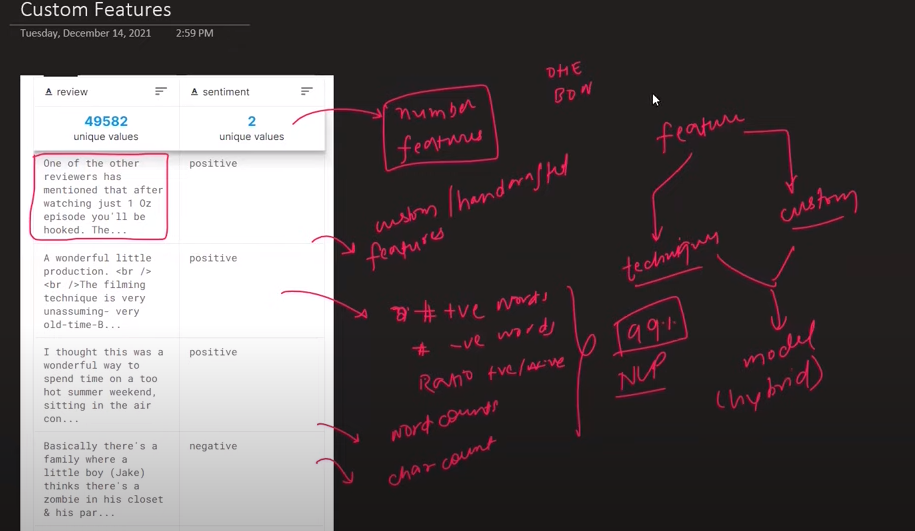